In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
import re
import pycountry
import difflib
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
%matplotlib inline

In [2]:
# Lets list all of the available data that we have
# basepath = os.getcwd()
# for folder in os.listdir():
#     path = os.path.join(basepath, folder)
#     try:
#         for f in os.listdir(path):
#             print(os.path.join(path, f))
#     except:
#         pass

# Descriptive

In [3]:
under5_deaths_df = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Death Rates and Details/under 5 deaths.csv')
under5_deaths_df.columns = ['Country', 'Year', 'Under 5 Mortality']
under5_deaths_df.head()

,Country,Year,Under 5 Mortality
0,Afghanistan,2016,70.4 [56.6-84.7]
1,Afghanistan,2015,73.2 [60.2-86.1]
2,Afghanistan,2014,76.1 [64.0-88.1]
3,Afghanistan,2013,79.3 [68.2-90.7]
4,Afghanistan,2012,82.8 [72.7-93.4]


In [4]:
# split Under 5 Mortality column to 2 columns
under5_deaths_df['Under 5 Mortality'], under5_deaths_df['Mortality Range'] = zip(*under5_deaths_df['Under 5 Mortality'].str.split(' ').tolist())
under5_deaths_df.head()

,Country,Year,Under 5 Mortality,Mortality Range
0,Afghanistan,2016,70.4,[56.6-84.7]
1,Afghanistan,2015,73.2,[60.2-86.1]
2,Afghanistan,2014,76.1,[64.0-88.1]
3,Afghanistan,2013,79.3,[68.2-90.7]
4,Afghanistan,2012,82.8,[72.7-93.4]


### 3 most recent years and 3 regions with the worst rates

In [5]:
under5_deaths_df['Under 5 Mortality'] = under5_deaths_df['Under 5 Mortality'].astype(float)
under5_deaths_df['Year'] = under5_deaths_df['Year'].astype(int)
under5_deaths_df = under5_deaths_df[under5_deaths_df['Year'] >= (max(under5_deaths_df['Year']) - 2)]

Text(0.5,1,'Top 10 Average Mortality By Region From 2014 to 2016')

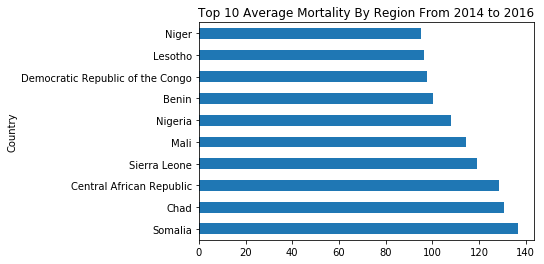

In [6]:
avg_mortality_3yrs = under5_deaths_df.groupby('Country')['Under 5 Mortality'].mean().reset_index()
avg_mortality_3yrs.sort_values('Under 5 Mortality', ascending=False).head(10).set_index('Country').plot(kind='barh', legend=False)
plt.title('Top 10 Average Mortality By Region From 2014 to 2016')

In [7]:
top_25 = avg_mortality_3yrs.sort_values('Under 5 Mortality', ascending=False).head(25)['Country'].tolist()

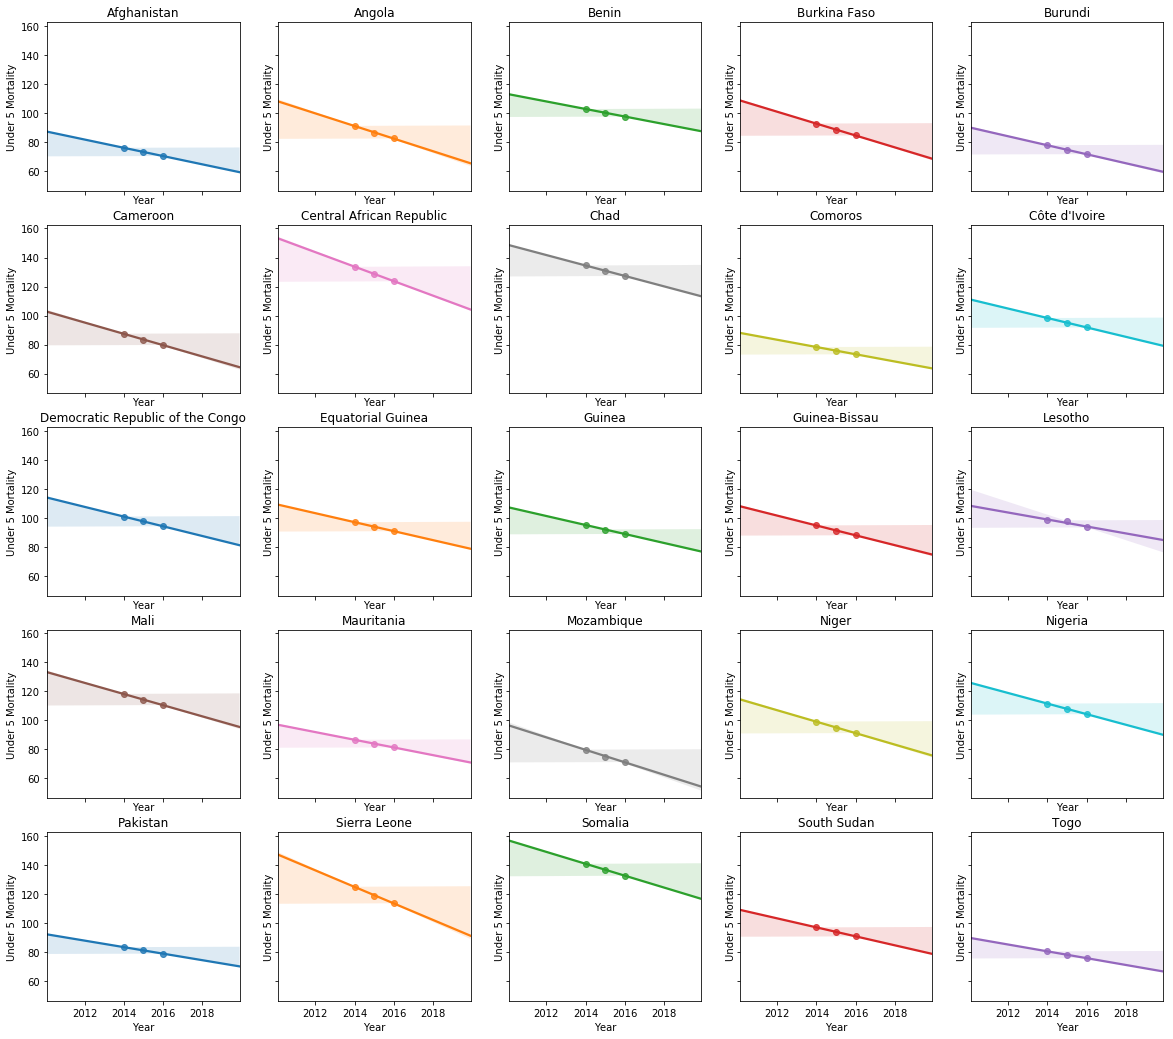

In [8]:
# filter for the 25 countries with the highest avg mortality
top_25_df = under5_deaths_df[under5_deaths_df['Country'].isin(top_25)]

# 3 year trendline
top_25_df = top_25_df.set_index('Country').sort_values('Year')
fig, axes = plt.subplots(5,5, figsize=(20,18), sharey=True, sharex=True)
for (country, group), ax in zip(top_25_df.groupby(top_25_df.index), axes.flatten()):
    ax.set_title(country)
    sns.regplot(x='Year', y='Under 5 Mortality', data=group, ax=ax)

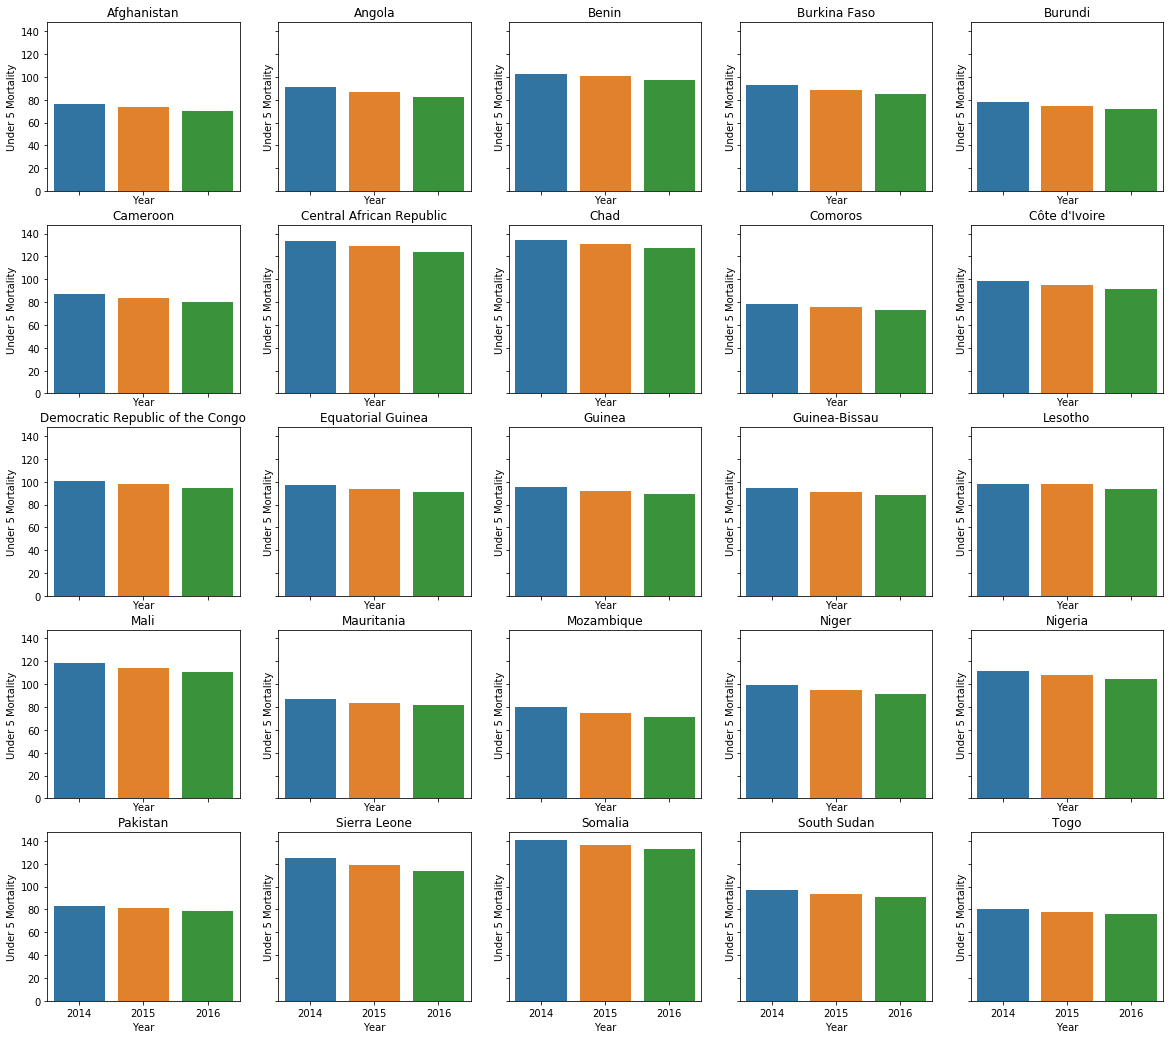

In [9]:
# Distribution By Country
fig, axes = plt.subplots(5,5, figsize=(20,18), sharey=True, sharex=True)
for (country, group), ax in zip(top_25_df.groupby(top_25_df.index), axes.flatten()):
    ax.set_title(country)
    sns.barplot(x='Year', y='Under 5 Mortality', data=group, ax=ax)

### World and SSA Mortality Rate

In [10]:
mortality_df = pd.read_excel("/home/riley/PycharmProjects/HealthCareAnalysis/New Data/Unicef SSA _mortality_rate_2017.xls",
                             sheet_name='Country estimates', skiprows=11)
mortality_df = mortality_df.iloc[0:587,:]
mortality_df = mortality_df[['ISO Code', 'Country Name', 'Uncertainty bounds*', 2014.5, 2015.5, 2016.5]]
mortality_df = mortality_df.set_index(['ISO Code', 'Country Name', 'Uncertainty bounds*'])
mortality_df['3 year avg mortality'] = mortality_df.mean(axis=1)
mortality_df = mortality_df.reset_index()
medians = mortality_df[mortality_df['Uncertainty bounds*']=='Median']
medians_top9 = medians.sort_values('3 year avg mortality', ascending=False).head(9)
countries = medians_top9['Country Name'].tolist()
mortality_df_top9 = mortality_df[mortality_df['Country Name'].isin(countries)]
mortality_df_top9 = mortality_df_top9.drop(['ISO Code', '3 year avg mortality'], axis=1).reset_index(drop=True)
mortality_df_top9

,Country Name,Uncertainty bounds*,2014.5,2015.5,2016.5
0,Benin,Lower,82.0,78.3,74.1
1,Benin,Median,102.8,100.3,97.6
2,Benin,Upper,130.3,131.1,131.9
3,Central African Republic,Lower,92.0,85.9,79.8
4,Central African Republic,Median,133.6,128.8,123.6
5,Central African Republic,Upper,193.7,193.4,191.9
6,Chad,Lower,116.2,111.0,105.3
7,Chad,Median,134.5,130.9,127.3
8,Chad,Upper,153.8,151.5,150.3
9,Democratic Republic of the Congo,Lower,76.1,71.8,67.4


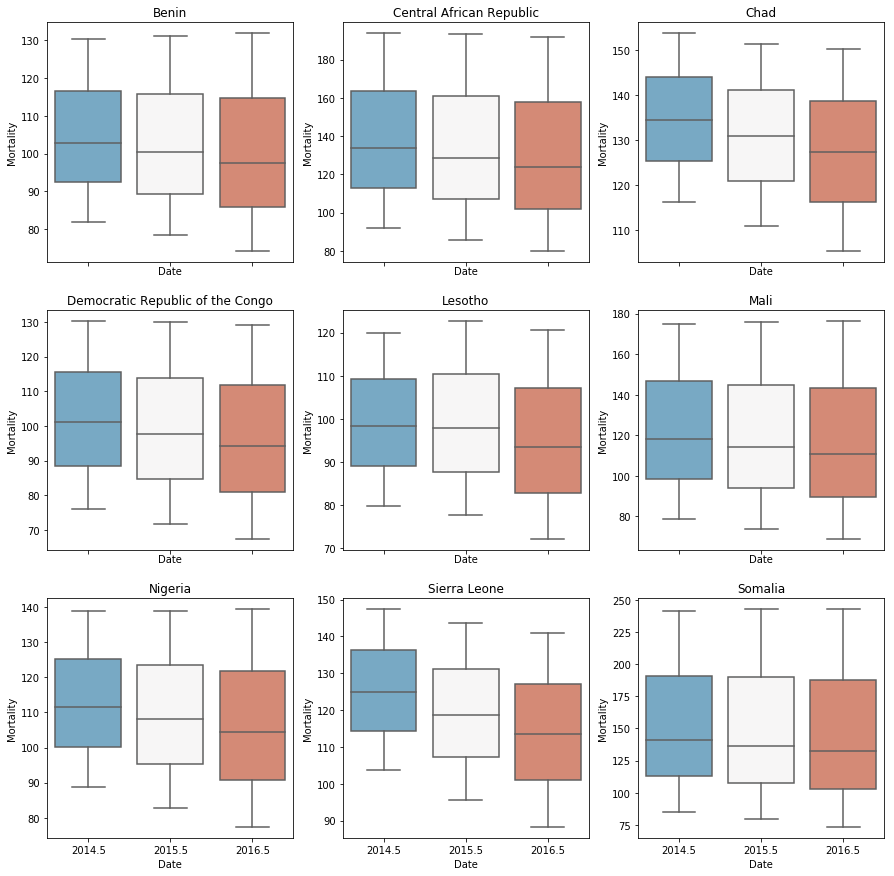

In [11]:
mortality_df_top9 = pd.melt(mortality_df_top9, id_vars=['Country Name', 'Uncertainty bounds*'], var_name='Date', value_name='Mortality')
mortality_df_top9 = mortality_df_top9.set_index('Country Name')
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True)
for (country, group), ax in zip(mortality_df_top9.groupby(mortality_df_top9.index), axes.flatten()):
    ax.set_title(country)
    sns.boxplot(x='Date', y='Mortality', data=group, ax=ax, palette="RdBu_r")

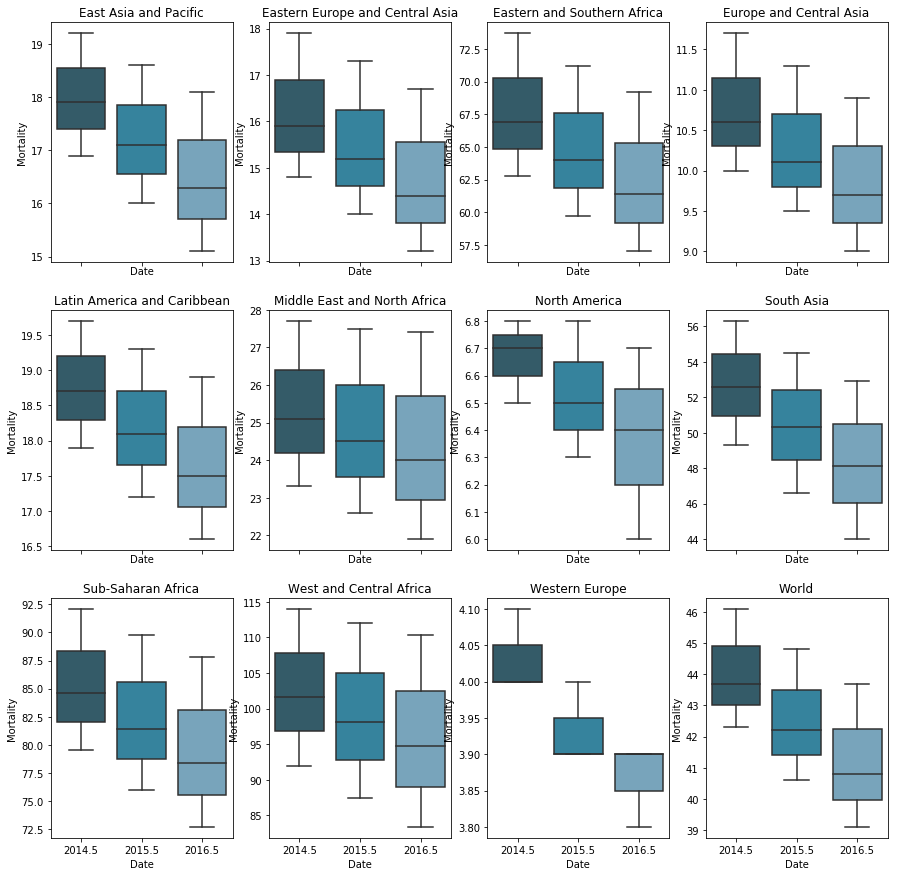

In [12]:
mortality_df2 = pd.read_excel("/home/riley/PycharmProjects/HealthCareAnalysis/New Data/Unicef SSA _mortality_rate_2017.xls",
                             sheet_name='Regional and global estimates', skiprows=12)
mortality_df2 = mortality_df2.iloc[0:36,:]
mortality_df2 = mortality_df2[['Region Name', 'Uncertainty bounds*', 2014.5, 2015.5, 2016.5]]
mortality_df2 = pd.melt(mortality_df2, id_vars=['Region Name', 'Uncertainty bounds*'], var_name='Date', value_name='Mortality')
mortality_df2 = mortality_df2.set_index('Region Name')
fig, axes = plt.subplots(3,4, figsize=(15,15), sharex=True)

for (region, group), ax in zip(mortality_df2.groupby(mortality_df2.index), axes.flatten()):
    ax.set_title(region)
    sns.boxplot(x='Date', y='Mortality', data=group, ax=ax, palette="PuBuGn_d")

### Causes of Death in Africa

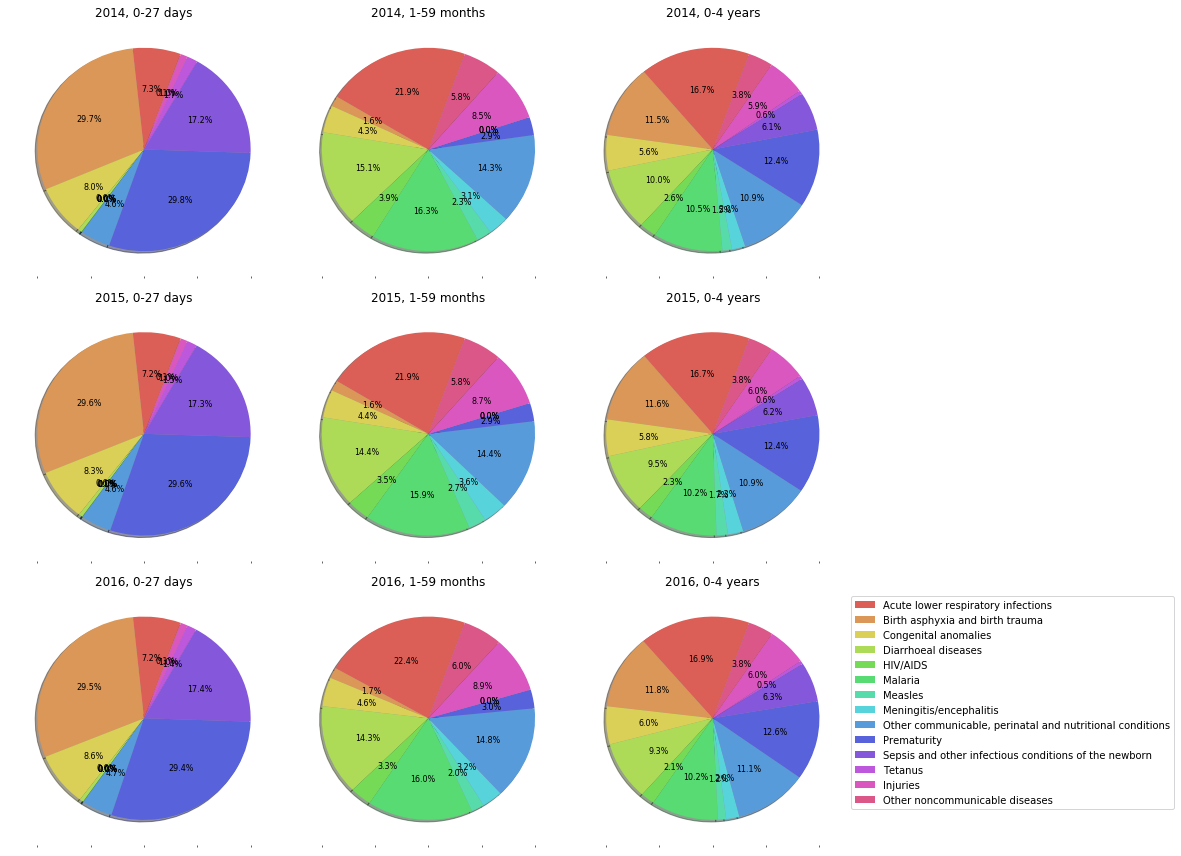

In [13]:
deaths = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/New Data/Cause of Death by Region - Cleaned by Bess.csv', skiprows=2)
deaths.columns = ['Cause of Death', 'Region', 'Year', '0-27 days', '1-59 months', '0-4 years']
deaths = deaths[deaths.Year.isin([2014, 2015, 2016])]
del deaths['Region']
deaths = pd.melt(deaths, id_vars=['Cause of Death', 'Year'], var_name='Infant Ages', value_name='Mortality')
Years = [2014, 2015, 2016]
InfantAges = ['0-27 days', '1-59 months', '0-4 years']

with sns.color_palette("hls", 14):
    fig, axes = plt.subplots(3,3, figsize=(12,12), sharex=True)

    for i in range(0, len(Years)): 
        for j in range(0, len(InfantAges)):
            data = deaths[(deaths['Year']==Years[i])&(deaths['Infant Ages']==InfantAges[j])]
            axes[i,j].set_title(str(Years[i])+", "+InfantAges[j])
            data.plot(kind='pie', y='Mortality', ax = axes[i,j], labels=None,
                      autopct='%1.1f%%', legend=False, fontsize=8, shadow=True, startangle=70)
            axes[i,j].set_ylabel("")
    plt.tight_layout()
    plt.legend(loc="upper left", labels=data['Cause of Death'], bbox_to_anchor=(1,1))


### World Bank Rankings for Health Spending Averages

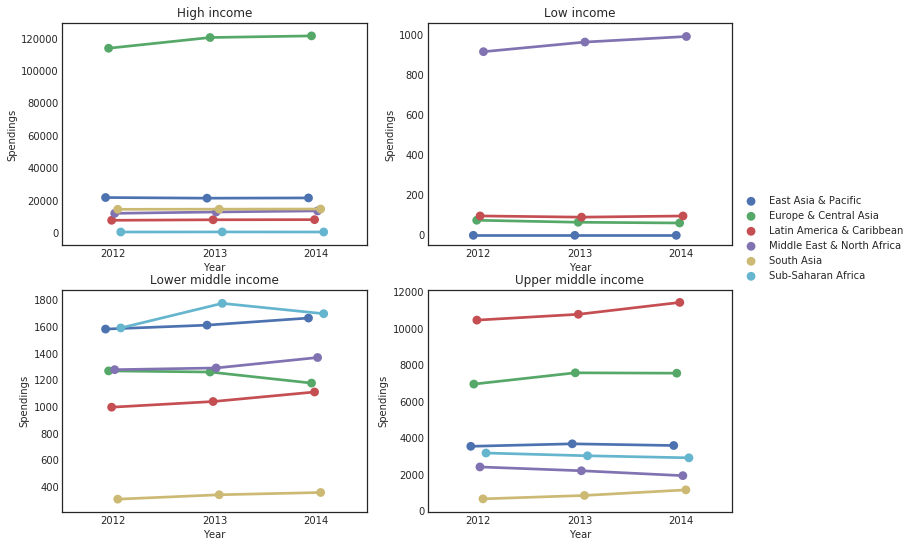

In [14]:
health_spendings = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/New Data/API_SH.XPD.PCAP_DS2_en_csv_v2.csv', skiprows=4)
health_spendings = health_spendings[['Country Name', 'Country Code', '2012', '2013', '2014']]
categories = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/New Data/Metadata_Country_API_SH.XPD.PCAP_DS2_en_csv_v2.csv')
categories = categories[['Country Code', 'Region', 'IncomeGroup']]
health_spendings = pd.merge(health_spendings, categories, on='Country Code', how='left')
health_spendings = health_spendings.groupby(['Region', 'IncomeGroup'])[['2012', '2013', '2014']].sum().reset_index()
health_spendings = pd.melt(health_spendings, id_vars=['Region', 'IncomeGroup'], var_name='Year', value_name='Spendings')
health_spendings = health_spendings.set_index('IncomeGroup')
sns.set_style('white')
fig, axes = plt.subplots(2,2, figsize=(12,9))
for (IncomeGroup, group), ax in zip(health_spendings.groupby(health_spendings.index), axes.flatten()):
    ax.set_title(IncomeGroup)
    sns.pointplot(data=group, x='Year', y='Spendings', hue='Region', ax=ax, dodge=True, palette='deep')
    ax.legend().set_visible(False)
plt.legend(loc='lower left', bbox_to_anchor=(1,1))
plt.show()


# Model

### Get Training Data

In [15]:
pcapXpdData = pd.read_excel('/home/riley/PycharmProjects/HealthCareAnalysis/Model/API_SH.XPD.PCAP_DS2.xlsx')
pcapXpdData = pd.melt(pcapXpdData, id_vars=['Country Name', 'Country Code', 'Region'], var_name='Year', value_name='PCAPXpd')
pcapXpdData[['Country Name', 'Country Code', 'Region']] = pcapXpdData[['Country Name', 'Country Code', 'Region']].astype(str)
pcapXpdData['Year'] = pcapXpdData['Year'].astype(int)
pcapXpdData.head(5)

,Country Name,Country Code,Region,Year,PCAPXpd
0,Afghanistan,AFG,South Asia,2002,15.48
1,Angola,AGO,Sub-Saharan Africa,2002,28.19
2,Albania,ALB,Europe & Central Asia,2002,89.92
3,Andorra,AND,Europe & Central Asia,2002,1450.80
4,Arab World,ARB,Middle East & North Africa,2002,118.74


In [16]:
# Iraq 2002 has a null value, so will backfill
pcapXpdData['PCAPXpd'] = pcapXpdData.sort_values(['Country Code', 'Year']).groupby('Country Name')['PCAPXpd'].transform(lambda x: x.bfill())
pcapXpdData[pcapXpdData['Country Code']=='IRQ']

,Country Name,Country Code,Region,Year,PCAPXpd
89,Iraq,IRQ,Middle East & North Africa,2002,16.41
299,Iraq,IRQ,Middle East & North Africa,2003,16.41
509,Iraq,IRQ,Middle East & North Africa,2004,55.83
719,Iraq,IRQ,Middle East & North Africa,2005,55.49
929,Iraq,IRQ,Middle East & North Africa,2006,59.33
1139,Iraq,IRQ,Middle East & North Africa,2007,97.30
1349,Iraq,IRQ,Middle East & North Africa,2008,146.59
1559,Iraq,IRQ,Middle East & North Africa,2009,146.76
1769,Iraq,IRQ,Middle East & North Africa,2010,144.98
1979,Iraq,IRQ,Middle East & North Africa,2011,164.05


In [17]:
totalXpdData = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Model/API_SH.XPD.TOTL.ZS_DS2_en_csv_v2.csv')
totalXpdData = pd.melt(totalXpdData, id_vars=['Country Name', 'Country Code', 'Region'], var_name='Year', value_name='TotalXpd')
totalXpdData[['Country Name', 'Country Code', 'Region']] = totalXpdData[['Country Name', 'Country Code', 'Region']].astype(str)
totalXpdData['Year'] = totalXpdData['Year'].astype(int)
del totalXpdData['Country Name']
del totalXpdData['Region']
totalXpdData.head(5)

,Country Code,Year,TotalXpd
0,AFG,2003,8.816053
1,AGO,2003,4.405284
2,ALB,2003,6.267007
3,AND,2003,5.745033
4,ARB,2003,4.201716


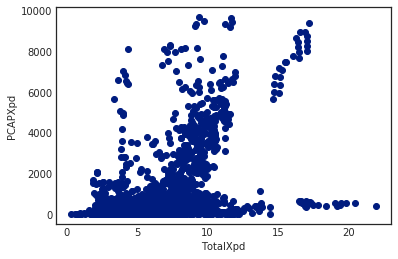

,Year,TotalXpd,PCAPXpd
Year,1.000000,0.081400,0.106182
TotalXpd,0.081400,1.000000,0.482547
PCAPXpd,0.106182,0.482547,1.000000


In [18]:
# Lets look at the correlation between TotalXpd and PCAPXpd to make sure they don't both tell us the same information
Xpd = pd.merge(totalXpdData,pcapXpdData, on=['Country Code', 'Year'], how='inner')
with sns.color_palette("dark"):
    plt.scatter(Xpd['TotalXpd'], Xpd['PCAPXpd'])
    plt.xlabel('TotalXpd')
    plt.ylabel('PCAPXpd')
    plt.show()
Xpd.corr()

In [19]:
IncomeGroups = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Health expendiature per capita, USD/Metadata_Country_API_SH.XPD.PCAP_DS2_en_csv_v2.csv')
IncomeGroups = IncomeGroups[['Country Code', 'IncomeGroup']]
data = pd.merge(Xpd, IncomeGroups, on=['Country Code'], how='left')
data.head(5)

,Country Code,Year,TotalXpd,Country Name,Region,PCAPXpd,IncomeGroup
0,AFG,2003,8.816053,Afghanistan,South Asia,19.33,Low income
1,AGO,2003,4.405284,Angola,Sub-Saharan Africa,37.45,Lower middle income
2,ALB,2003,6.267007,Albania,Europe & Central Asia,112.63,Upper middle income
3,AND,2003,5.745033,Andorra,Europe & Central Asia,1827.84,High income
4,ARB,2003,4.201716,Arab World,Middle East & North Africa,113.75,NaN


In [20]:
def getMostCommonIncomeGroup(group):
    IncomeGroups = group['IncomeGroup'].tolist()
    d = {}
    for group in IncomeGroups: 
        if group not in d: 
            d[group] = 1
        else:
            d[group] += 1
    return max(d, key=lambda i: d[i])
    

IncomeGroupFill = data.groupby(['Region']).apply(getMostCommonIncomeGroup)
MapVals = IncomeGroupFill.to_dict()
MapVals

{'East Asia & Pacific': 'Lower middle income',
 'Europe & Central Asia': 'High income',
 'Latin America & Caribbean': 'Upper middle income',
 'Middle East & North Africa': 'High income',
 'North America': 'High income',
 'South Asia': 'Lower middle income',
 'Sub-Saharan Africa': 'Low income',
 'World': nan}

In [21]:
# remove World from data. 
data = data[data['Country Name']!='World']
# replace null IncomeGroups with values from MapVals (most frequent occurrence of Income Group of the designated region)
data['IncomeGroup'] = np.where(pd.isnull(data['IncomeGroup']), data['Region'].map(MapVals), data['IncomeGroup'])
data.head()

,Country Code,Year,TotalXpd,Country Name,Region,PCAPXpd,IncomeGroup
0,AFG,2003,8.816053,Afghanistan,South Asia,19.33,Low income
1,AGO,2003,4.405284,Angola,Sub-Saharan Africa,37.45,Lower middle income
2,ALB,2003,6.267007,Albania,Europe & Central Asia,112.63,Upper middle income
3,AND,2003,5.745033,Andorra,Europe & Central Asia,1827.84,High income
4,ARB,2003,4.201716,Arab World,Middle East & North Africa,113.75,High income


In [22]:
# get basic sanitation data
sanitationData = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Model/Population using at least basic sanitation services (%).csv')
sanitationData = sanitationData[2:]
sanitationData.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
cols = ['Country']+[col for col in sanitationData.columns if col[-2:]  =='.2']
sanitationData = sanitationData[cols]
sanitationData = pd.melt(sanitationData, id_vars='Country', var_name='Year', value_name='Basic% Population Sanitation')
sanitationData['Year'] = sanitationData['Year'].map(lambda x: x[0:4]).astype(int)
sanitationData['Basic% Population Sanitation'] = sanitationData['Basic% Population Sanitation'].astype(float)
sanitationData = sanitationData.sort_values(['Country','Year']).reset_index(drop=True)
sanitationData['Basic% Population Sanitation']=sanitationData.groupby(['Country'])['Basic% Population Sanitation'].transform(lambda x: x.bfill())
sanitationData.head()

,Country,Year,Basic% Population Sanitation
0,Afghanistan,2000,24.0
1,Afghanistan,2001,24.0
2,Afghanistan,2002,25.0
3,Afghanistan,2003,26.0
4,Afghanistan,2004,27.0


In [23]:
listofEconomies = pd.read_excel('/home/riley/PycharmProjects/HealthCareAnalysis/Model/Country codes and income levels 2017.xls', skiprows=4)
listofEconomies = listofEconomies.iloc[1:219][['Economy', 'Code', 'Region', 'Income group']]
listofEconomies.columns = ['Country', 'Country Code', 'Region', 'Income group']
listofEconomies.tail()

,Country,Country Code,Region,Income group
214,Virgin Islands (U.S.),VIR,Latin America & Caribbean,High income
215,West Bank and Gaza,PSE,Middle East & North Africa,Lower middle income
216,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income
217,Zambia,ZMB,Sub-Saharan Africa,Lower middle income
218,Zimbabwe,ZWE,Sub-Saharan Africa,Low income


In [24]:
# we need to fix some of the mispelled countries. Do Fuzzy Matching. 
corpus = list(set(sanitationData['Country'].tolist() + listofEconomies['Country'].tolist()))
def correctCountrySpelling(country_name, corpus):
    matches = difflib.get_close_matches(country_name, corpus, cutoff=0.7)
    matches = [match for match in matches if match[0] == country_name[0]]
    matches = sorted(matches)[0]
    return matches
    
sanitationData['Country'] = sanitationData['Country'].apply(lambda x: correctCountrySpelling(x, corpus))
listofEconomies['Country'] = listofEconomies['Country'].apply(lambda x: correctCountrySpelling(x, corpus))

In [25]:
sanitationData = pd.merge(sanitationData, listofEconomies, on='Country', how='left')
CountryCodes = {'Bolivia (Plurinational State of)': 'BOL', 'Congo': 'COG', 'Cook Islands': 'COK',
       'Czechia': 'CZE', "Democratic People's Republic of Korea": 'PRK',
       'Democratic Republic of the Congo': 'COD', 'Egypt': 'EGY', 'Kyrgyzstan': 'KGZ',
       "Lao People's Democratic Republic": 'LA0',
       'Micronesia (Federated States of)': 'FSM', 'Niue': 'NIU', 'Republic of Korea': 'KOR',
       'The former Yugoslav republic of Macedonia': 'MKD',
       'United Kingdom of Great Britain and Northern Ireland': 'GBR',
       'United Republic of Tanzania': 'TZA',
       'Venezuela (Bolivarian Republic of)': 'VEN', 'Yemen': 'YEM'}
sanitationData['Country Code'] = np.where(pd.isnull(sanitationData['Country Code']), sanitationData['Country'].map(CountryCodes), sanitationData['Country Code'])
sanitationData.head()

,Country,Year,Basic% Population Sanitation,Country Code,Region,Income group
0,Afghanistan,2000,24.0,AFG,South Asia,Low income
1,Afghanistan,2001,24.0,AFG,South Asia,Low income
2,Afghanistan,2002,25.0,AFG,South Asia,Low income
3,Afghanistan,2003,26.0,AFG,South Asia,Low income
4,Afghanistan,2004,27.0,AFG,South Asia,Low income


In [26]:
sanitation_means = sanitationData.groupby(['Year', 'Region', 'Income group'])['Basic% Population Sanitation'].mean().reset_index()
sanitation_means.rename(columns={'Basic% Population Sanitation': 'Mean Basic Sanitation'}, inplace=True)
sanitation_means.head(10)

,Year,Region,Income group,Mean Basic Sanitation
0,2000,East Asia & Pacific,High income,97.285714
1,2000,East Asia & Pacific,Lower middle income,39.416667
2,2000,East Asia & Pacific,Upper middle income,76.000000
3,2000,Europe & Central Asia,High income,95.545455
4,2000,Europe & Central Asia,Lower middle income,92.500000
5,2000,Europe & Central Asia,Upper middle income,88.923077
6,2000,Latin America & Caribbean,High income,88.714286
7,2000,Latin America & Caribbean,Low income,17.000000
8,2000,Latin America & Caribbean,Lower middle income,65.750000
9,2000,Latin America & Caribbean,Upper middle income,75.476190


In [27]:
sanitationData = pd.merge(sanitationData, sanitation_means, on=['Year', 'Region', 'Income group'], how='left')
sanitationData['Basic% Population Sanitation'] = np.where(pd.isnull(sanitationData['Basic% Population Sanitation']), sanitationData['Mean Basic Sanitation'], sanitationData['Basic% Population Sanitation'])
sanitationData = sanitationData.drop(['Mean Basic Sanitation', 'Income group', 'Region', 'Country'], axis=1)
data = pd.merge(data, sanitationData, on=['Country Code', 'Year'], how='inner')
data.head()

,Country Code,Year,TotalXpd,Country Name,Region,PCAPXpd,IncomeGroup,Basic% Population Sanitation
0,AFG,2003,8.816053,Afghanistan,South Asia,19.33,Low income,26.0
1,AGO,2003,4.405284,Angola,Sub-Saharan Africa,37.45,Lower middle income,24.0
2,ALB,2003,6.267007,Albania,Europe & Central Asia,112.63,Upper middle income,91.0
3,AND,2003,5.745033,Andorra,Europe & Central Asia,1827.84,High income,100.0
4,ARE,2003,2.646407,United Arab Emirates,Middle East & North Africa,907.58,High income,100.0


In [28]:
# get population densities
popDensity = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Model/API_EN.POP.DNST_DS2_en_csv_v2.csv', skiprows=4)
popDensity = popDensity.drop(['Country Name', 'Indicator Name', 'Indicator Code', 'Unnamed: 62'], axis=1)
popDensity = pd.melt(popDensity, id_vars='Country Code', var_name='Year', value_name='Population Density')
popDensity['Country Code'] = popDensity['Country Code'].astype(str)
popDensity['Year'] = popDensity['Year'].astype(int)
data = pd.merge(data, popDensity, on=['Year', 'Country Code'], how='left')

In [29]:
# get safe drinking water data
water = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Model/safe drinking water.csv')
water = water.iloc[2:]
water.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
cols = ['Country']+[col for col in water.columns if col[-2:]  =='.2']
water = water[cols]
water = pd.melt(water, id_vars='Country', var_name='Year', value_name='% Pop Safe Water')
water['Year'] = water['Year'].map(lambda x: x[0:4]).astype(int)
water['% Pop Safe Water'] = water['% Pop Safe Water'].astype(float)
water = water.sort_values(['Country', 'Year']).reset_index(drop=True)
water['% Pop Safe Water']=water.groupby(['Country'])['% Pop Safe Water'].transform(lambda x: x.bfill())
water.head()

,Country,Year,% Pop Safe Water
0,Afghanistan,2000,27.0
1,Afghanistan,2001,27.0
2,Afghanistan,2002,30.0
3,Afghanistan,2003,32.0
4,Afghanistan,2004,35.0


In [30]:
water['Country'] = water['Country'].astype(str).apply(lambda x: correctCountrySpelling(x, corpus))
water = pd.merge(water, listofEconomies, on='Country', how='left')
water['Country Code'] = np.where(pd.isnull(water['Country Code']), water['Country'].map(CountryCodes), water['Country Code'])
water['% Pop Safe Water'] = water['% Pop Safe Water'].fillna(water.groupby(['Year', 'Region', 'Income group'])['% Pop Safe Water'].transform('mean'))
water = water.drop(['Country', 'Region', 'Income group'], axis=1)
data = pd.merge(data, water, on=['Year', 'Country Code'], how='inner')

In [31]:
# get immunization on coverage data
immun = pd.read_csv('/home/riley/PycharmProjects/HealthCareAnalysis/Model/immunization coverage among 1-year-olds.csv', skiprows=1)
immun = pd.melt(immun, id_vars='Country', var_name='Year', value_name='% Pop Immunized')
immun['Country'] = immun['Country'].astype(str)
immun['Year'] = immun['Year'].astype(int)
immun = immun.sort_values(['Country', 'Year']).reset_index(drop=True)
immun['% Pop Immunized'] = immun.groupby(['Country'])['% Pop Immunized'].transform(lambda x: x.bfill())
immun['Country'] = immun['Country'].astype(str).apply(lambda x: correctCountrySpelling(x, corpus))
immun = pd.merge(immun, listofEconomies, on='Country', how='left')
immun['Country Code'] = np.where(pd.isnull(immun['Country Code']), immun['Country'].map(CountryCodes), immun['Country Code'])
immun = immun.drop(['Country', 'Region', 'Income group'], axis=1)
data = pd.merge(data, immun, on=['Year', 'Country Code'], how='inner')

In [32]:
# get mortality rates
mortality_df = pd.read_excel("/home/riley/PycharmProjects/HealthCareAnalysis/New Data/Unicef SSA _mortality_rate_2017.xls",
                             sheet_name='Country estimates', skiprows=11)
mortality_df = mortality_df.iloc[0:587,:]
mortality_df = mortality_df[mortality_df['Uncertainty bounds*']=='Median']
del mortality_df['Uncertainty bounds*']
mortality_df = pd.melt(mortality_df, id_vars=['ISO Code', 'Country Name'], var_name='Year', value_name='Mortality')
del mortality_df['Country Name']
mortality_df['Year'] = mortality_df['Year'].astype(str).map(lambda x: x[0:4])
mortality_df['Year'] = mortality_df['Year'].astype(int)
mortality_df.rename(columns={'ISO Code': 'Country Code'}, inplace=True)
mortality_df.head()

,Country Code,Year,Mortality
0,AFG,1950,NaN
1,ALB,1950,NaN
2,DZA,1950,NaN
3,AND,1950,NaN
4,AGO,1950,NaN


In [33]:
data = pd.merge(data, mortality_df, on=['Country Code', 'Year'], how='inner')
modelData = data.drop(['Country Code', 'Country Name'], axis=1)
modelData.head()

,Year,TotalXpd,Region,PCAPXpd,IncomeGroup,Basic% Population Sanitation,Population Density,% Pop Safe Water,% Pop Immunized,Mortality
0,2003,8.816053,South Asia,19.33,Low income,26.0,35.328939,32.0,41.0,118.3
1,2003,4.405284,Sub-Saharan Africa,37.45,Lower middle income,24.0,14.601242,39.0,40.0,185.7
2,2003,6.267007,Europe & Central Asia,112.63,Upper middle income,91.0,110.934891,88.0,97.0,22.4
3,2003,5.745033,Europe & Central Asia,1827.84,High income,100.0,155.706383,100.0,99.0,4.1
4,2003,2.646407,Middle East & North Africa,907.58,High income,100.0,44.759952,100.0,94.0,10.3


In [34]:
# we need to do one hot encoding for regions and label encoding for Income Group
IncomeGroupEncoder = {'Low income':0, 'Lower middle income':1, 'Upper middle income':2, 'High income':3}
modelData['IncomeGroup'] = modelData['IncomeGroup'].map(IncomeGroupEncoder)
modelData = pd.get_dummies(modelData, columns=['Region'])
modelData.head()

,Year,TotalXpd,PCAPXpd,IncomeGroup,Basic% Population Sanitation,Population Density,% Pop Safe Water,% Pop Immunized,Mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,2003,8.816053,19.33,0,26.0,35.328939,32.0,41.0,118.3,0,0,0,0,0,1,0
1,2003,4.405284,37.45,1,24.0,14.601242,39.0,40.0,185.7,0,0,0,0,0,0,1
2,2003,6.267007,112.63,2,91.0,110.934891,88.0,97.0,22.4,0,1,0,0,0,0,0
3,2003,5.745033,1827.84,3,100.0,155.706383,100.0,99.0,4.1,0,1,0,0,0,0,0
4,2003,2.646407,907.58,3,100.0,44.759952,100.0,94.0,10.3,0,0,0,1,0,0,0


### Train Multiple Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import cross_val_score

/home/riley/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# reshuffle rows of dataframe for random sampling
modelData = modelData.sample(frac=1).reset_index(drop=True)
# remove rows where there is a null value
modelData = modelData.dropna(how='any')
modelData.head()

,Year,TotalXpd,PCAPXpd,IncomeGroup,Basic% Population Sanitation,Population Density,% Pop Safe Water,% Pop Immunized,Mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,2005,8.453893,3214.03,3,100.0,2.654778,100.0,92.0,5.7,1,0,0,0,0,0,0
1,2004,8.462672,1280.23,3,37.0,1253.962500,98.0,89.0,7.0,0,0,0,1,0,0,0
2,2007,5.300443,58.25,1,82.0,99.763611,91.0,94.0,82.7,0,0,0,0,0,0,1
3,2013,9.363738,6258.47,3,100.0,3.012887,100.0,95.0,4.2,1,0,0,0,0,0,0
4,2004,7.816171,16.54,0,98.0,134.450976,56.0,89.0,124.2,0,0,0,0,0,0,1


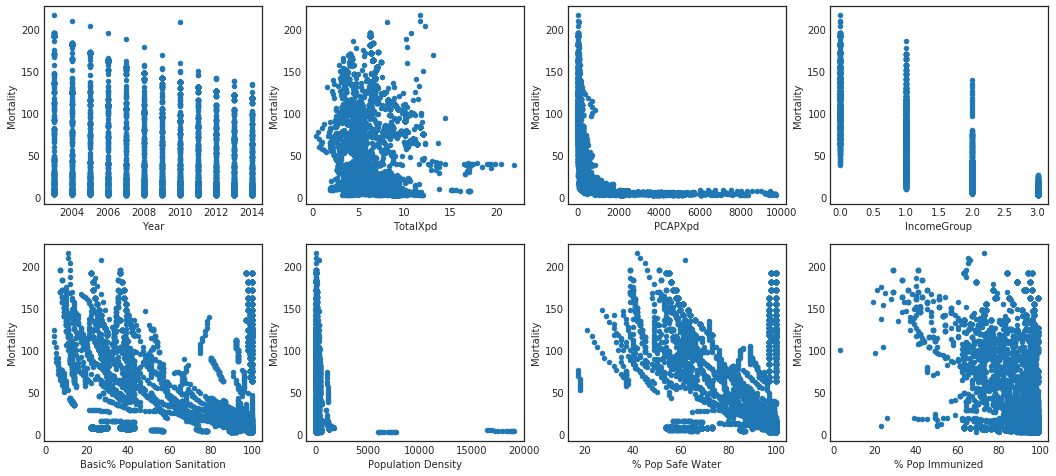

In [37]:
# pairplot showing relationship between each predictor and the response variable independently 
modelData_subset = modelData[['Year', 'TotalXpd', 'PCAPXpd', 'IncomeGroup', 'Basic% Population Sanitation', 'Population Density', '% Pop Safe Water', '% Pop Immunized', 'Mortality']]
fig, axes = plt.subplots(2,4, figsize=(18,8))
X = modelData_subset.columns[0:-1]
Y = modelData_subset['Mortality']


for variable, axis in zip(X, axes.flatten()):
    modelData_subset.plot(x=variable, y='Mortality', kind='scatter', ax=axis)
plt.show()
    

In [38]:
X = np.array(modelData.drop(['Mortality'], axis=1))
y = np.array(modelData['Mortality'])

# create training and test vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

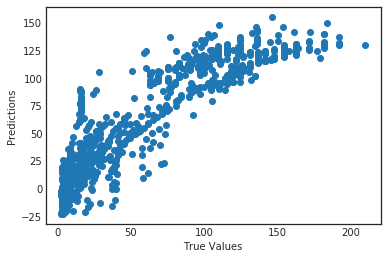

In [39]:
# Scatter plot
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [40]:
# Accuracy Score (R2)
print("Accuracy Score/Goodness of Fit:%.2f" %model.score(X_test, y_test))
# Mean Squared Error
print("Mean Squared Error:%.2f" %metrics.mean_squared_error(y_test, predictions))

Accuracy Score/Goodness of Fit:0.85
Mean Squared Error:398.82


In [41]:
# Cross Validation
scores = cross_val_score(lm, X, y, cv=5)
print("Average Score: ", scores.mean(), scores)

Average Score:  0.8560374039309838 [0.85321015 0.8525679  0.84722984 0.86201623 0.8651629 ]


In [42]:
# Look at some sample test response values and compare with predicted values from model
for i, prediction in enumerate(predictions[0:25]):
    print("Predicted: %s, Target: %s" %(prediction, y_test[i]))

Predicted: 8.182505280879923, Target: 6.9
Predicted: 13.039695668165223, Target: 7.1
Predicted: 12.645318386164945, Target: 7.0
Predicted: 128.28336194729127, Target: 98.0
Predicted: -5.442584677110062, Target: 6.9
Predicted: -2.5454747650801437, Target: 3.9
Predicted: 67.61175181114413, Target: 40.1
Predicted: 8.19615154317853, Target: 9.3
Predicted: 5.191680795742286, Target: 6.9
Predicted: 2.1583411378660458, Target: 8.0
Predicted: 109.47526356661183, Target: 126.6
Predicted: 122.27913914699093, Target: 136.5
Predicted: 13.559015265486778, Target: 40.2
Predicted: 21.435514771384987, Target: 8.0
Predicted: 27.934767142502096, Target: 28.3
Predicted: 57.414705737576696, Target: 46.3
Predicted: 9.842574316096943, Target: 7.0
Predicted: 63.34061109148388, Target: 45.5
Predicted: 15.643557234674518, Target: 5.6
Predicted: 6.731560803493267, Target: 6.9
Predicted: 22.22452837135006, Target: 39.1
Predicted: 101.46421649532203, Target: 83.2
Predicted: 30.87883898824839, Target: 29.4
Predict

### Residuals Plot

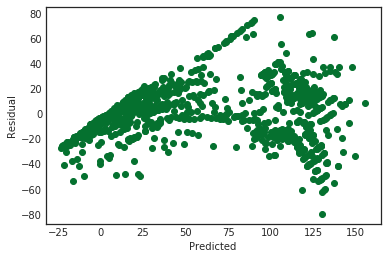

In [43]:
# for simple regression model
# can see below, that the shape implies nonlinear 
residuals = predictions - y_test
with sns.color_palette('BuGn_r'):
    plt.scatter(predictions, residuals)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.show()

### Polynomial Regression

In [44]:
# It looks like plotting the observed values vs. the predictions shows nonlinear behaviour, so maybe we should try polynomial regression?
quadratic_featurizer = PolynomialFeatures(degree=3)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print("Quadratic Regression r-squared: %.2f" %regressor_quadratic.score(X_test_quadratic, y_test))

Quadratic Regression r-squared: 0.98


In [46]:
y_pred = regressor_quadratic.predict(X_test_quadratic)
for i, prediction in enumerate(y_pred[0:25]):
    print("Predicted: %.2f, Target: %.2f" %(prediction,y_test[i]))

Predicted: 6.73, Target: 6.90
Predicted: 9.12, Target: 7.10
Predicted: 7.00, Target: 7.00
Predicted: 121.47, Target: 98.00
Predicted: 7.88, Target: 6.90
Predicted: 2.69, Target: 3.90
Predicted: 40.12, Target: 40.10
Predicted: 20.64, Target: 9.30
Predicted: 5.29, Target: 6.90
Predicted: 8.28, Target: 8.00
Predicted: 123.67, Target: 126.60
Predicted: 132.92, Target: 136.50
Predicted: 52.50, Target: 40.20
Predicted: 9.20, Target: 8.00
Predicted: 23.23, Target: 28.30
Predicted: 48.25, Target: 46.30
Predicted: 5.93, Target: 7.00
Predicted: 55.29, Target: 45.50
Predicted: 3.53, Target: 5.60
Predicted: 8.39, Target: 6.90
Predicted: 30.19, Target: 39.10
Predicted: 78.00, Target: 83.20
Predicted: 21.01, Target: 29.40
Predicted: 11.57, Target: 8.10
Predicted: 4.18, Target: 6.80


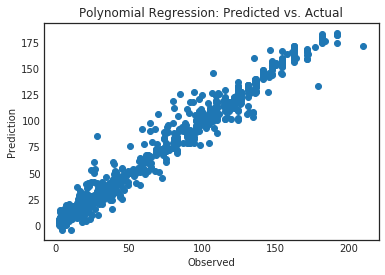

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel('Observed')
plt.ylabel('Prediction')
plt.title('Polynomial Regression: Predicted vs. Actual')
plt.show()

### Residuals Plot

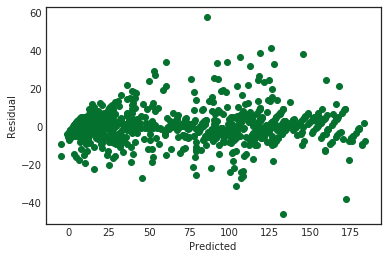

In [48]:
# for polynomial regression model
residuals = y_pred - y_test
with sns.color_palette('BuGn_r'):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.show()

## Proposed Action Plan

/home/riley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


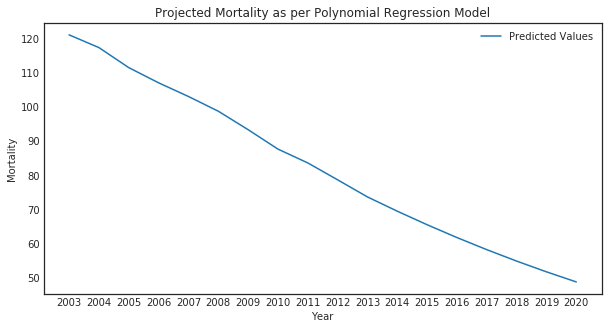

In [106]:
SSA = modelData[modelData['Region_Sub-Saharan Africa']==1]
# we can just take the mean of features for all countries in SSA for simplicity
SSA_group = SSA.groupby(['Year']).mean().reset_index()

# create fake data for years 2015 to 2020
for i in range(0, 6):
    Last_idx = SSA_group.iloc[-1]
    Last_diff = SSA_group.diff().iloc[-1]
    new_row = Last_idx + Last_diff
    SSA_group = SSA_group.append(new_row)

SSA_group = SSA_group.drop(['Mortality'], axis=1).reset_index(drop=True)
SSA_test = quadratic_featurizer.transform(SSA_group)
predicted_values = regressor_quadratic.predict(SSA_test)

SSA_group['Predicted Values'] = pd.Series(predicted_values)
df = SSA_group[['Year', 'Predicted Values']]
df['Year'] = df['Year'].astype(int)

fig, ax = plt.subplots(1, figsize=(10,5))
ax.set_xticks(df['Year'].tolist())
plt.title('Projected Mortality as per Polynomial Regression Model')
plt.ylabel('Mortality')
df.plot(x='Year', y='Predicted Values', ax=ax)
plt.show()


In [123]:
# We want to reduce to reduce infant mortality to 25
# How much spending should we increase by?
params = np.linspace(1,5, 50)
for i in params: 
    SSA_target = SSA_group.drop(['Predicted Values'], axis=1)
    SSA_target.ix[17, 'TotalXpd'] = SSA_target.ix[17, 'TotalXpd']*i
    SSA_target.ix[17, 'PCAPXpd'] = SSA_target.ix[17, 'PCAPXpd']*i
    s = np.array(SSA_target.iloc[-1]).reshape(1,-1)
    SSA_test = quadratic_featurizer.transform(s)
    predicted_values = regressor_quadratic.predict(SSA_test)
    print("Multiplier for Health Spending: ", i, ", Mortality: ", list(predicted_values)[0])



/home/riley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Multiplier for Health Spending:  1.0 , Mortality:  48.50895450456301
Multiplier for Health Spending:  1.0816326530612246 , Mortality:  49.55767584624118
Multiplier for Health Spending:  1.163265306122449 , Mortality:  50.61985183614888
Multiplier for Health Spending:  1.2448979591836735 , Mortality:  51.69014669553144
Multiplier for Health Spending:  1.3265306122448979 , Mortality:  52.7632246465364
Multiplier for Health Spending:  1.4081632653061225 , Mortality:  53.83374991075834
Multiplier for Health Spending:  1.489795918367347 , Mortality:  54.89638671008288
Multiplier for Health Spending:  1.5714285714285714 , Mortality:  55.94579926569713
Multiplier for Health Spending:  1.6530612244897958 , Mortality:  56.976651799923275
Multiplier for Health Spending:  1.7346938775510203 , Mortality:  57.98360853403574
Multiplier for Health Spending:  1.816326530612245 , Mortality:  58.961333690123865
Multiplier for Health Spending:  1.8979591836734693 , Mortality:  59.90449148986954
Multiplie